In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow keras 

In [2]:
import pandas as pd

# Example of loading a dataset
data = pd.read_csv('eeg_data.csv')
print(data.head())

   time  channel_1  channel_2  channel_3  channel_4
0  0.01       12.3        7.8        9.4       10.2
1  0.02       15.7        8.1        9.6       10.5
2  0.03       13.8        7.5        9.2       10.1
3  0.04       14.2        7.9        9.5       10.4
4  0.05       13.0        7.6        9.3       10.3


In [3]:
print(data.columns)

Index(['time', 'channel_1', 'channel_2', 'channel_3', 'channel_4'], dtype='object')


In [4]:
print([col for col in data.columns if 'time' in col.lower()])

['time']


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('time', axis=1))

X = data_scaled
y = data['time']

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, input_shape=(X.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(X, y, epochs=10, validation_split=0.2)

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 0.7557 - val_accuracy: 0.0000e+00 - val_loss: 0.7065
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.0000e+00 - loss: 0.7168 - val_accuracy: 0.0000e+00 - val_loss: 0.6941
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0000e+00 - loss: 0.6812 - val_accuracy: 0.0000e+00 - val_loss: 0.6822
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: 0.6498 - val_accuracy: 0.0000e+00 - val_loss: 0.6694
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0000e+00 - loss: 0.6226 - val_accuracy: 0.0000e+00 - val_loss: 0.6553
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.0000e+00 - loss: 0.5980 - val_accuracy: 0.0000e+00 - val_loss: 0.6400
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0000e+00 - loss: 0.5753 - val_accuracy: 0.0000e+00 - val_loss: 0.6242
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0000e+

In [8]:
import gym

# Create an environment with a specified render mode
env = gym.make('CartPole-v1', render_mode='human')  # Use 'human' for real-time rendering
observation = env.reset()

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)  # Unpack 5 values
    
    if done or truncated:  # Check for both 'done' and 'truncated'
        observation = env.reset()

env.close()

In [9]:
env = gym.make('CartPole-v1', render_mode='human')

In [10]:
import gym

# Create an environment with human render mode
env = gym.make('CartPole-v1', render_mode='human')
observation = env.reset()

try:
    for i in range(1000):
        env.render()
        # Ensure observation is extracted correctly
        if isinstance(observation, tuple):
            observation = observation[0]
        
        # Get the action prediction from the model and convert it to a valid action
        action = model.predict(observation.reshape(1, -1))
        action = int(action > 0.5)  # Assuming action is a single value, threshold at 0.5

        observation, reward, done, truncated, info = env.step(action)

        if done or truncated:
            observation = env.reset()

finally:
    env.close()  # Ensure the environment is closed even if an error occurs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\KIIT\AppData\Local\Temp\ipykernel_39908\1524487425.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  action = int(action > 0.5)  # Assuming action is a single value, threshold at 0.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

In [11]:
def educational_module():
    print("Welcome to the Neural Interface Educational Module!")
    score = 0

    # Simple Quiz
    question1 = input("What is the capital of India? ")
    if question1.lower() == "New Delhi":
        score += 1

    question2 = input("Solve 4 + 7: ")
    if question2 == "11":
        score += 1

    print(f"Your score is: {score}/2")

educational_module()

Welcome to the Neural Interface Educational Module!


What is the capital of India?  New Delhi
Solve 4 + 7:  11


Your score is: 1/2


In [12]:
def adaptive_quiz(score):
    if score == 2:
        print("Great job! Here's a tougher question:")
        # Add more difficult questions
    else:
        print("Let's try some easier questions to help you learn.")
        # Add easier questions

# Define the score variable
score = 2  # or any other value based on your logic

# Call the function with the defined score
adaptive_quiz(score)

Great job! Here's a tougher question:


In [13]:
import pandas as pd
import numpy as np

# Example: Load user interaction data
user_data = pd.read_csv('interaction_data.csv')
print("User Interaction Data:")
print(user_data.head())

User Interaction Data:
   obs1  obs2  obs3  obs4  action
0   0.2   1.0   0.1   1.5       0
1   0.4   1.2   0.3   1.7       1
2   0.3   1.1   0.2   1.6       0
3   0.5   1.3   0.4   1.8       1
4   0.6   1.4   0.5   1.9       0


In [14]:
import numpy as np

# Simulate neural signal data
def generate_neural_data(num_samples=1000):
    return np.random.normal(0, 1, num_samples)

neural_data = generate_neural_data()

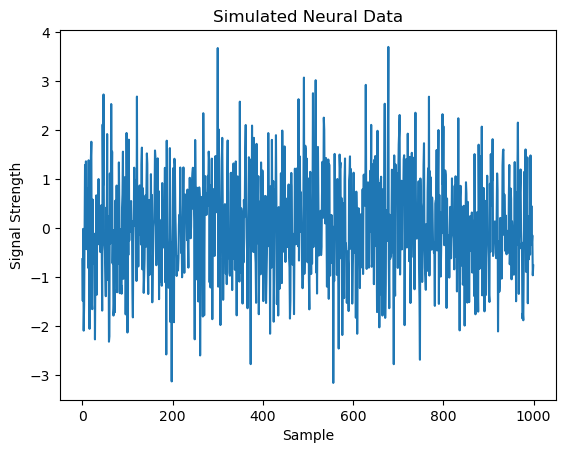

In [15]:
import matplotlib.pyplot as plt

plt.plot(neural_data)
plt.title('Simulated Neural Data')
plt.xlabel('Sample')
plt.ylabel('Signal Strength')
plt.show()

In [16]:
def simulate_user_interaction():
    # Simulate user interaction with content
    interaction_data = np.random.randint(0, 10, 100)
    return interaction_data

interaction_results = simulate_user_interaction()

- Encrypt neural data during transmission.
- Implement strict access controls to data.
- Regularly audit data access and usage.

- Obtain informed consent from users.
- Prevent use cases that could lead to addiction or misuse.
- Collaborate with ethical boards for review.


#### Neural Interface Entertainment and Education Network (NI-EEN)

#### 1. Introduction
- Project Overview
- Objectives

#### 2. Data Collection and Preparation
- Data Requirements
- Import and Preparation

#### 3. Neural Interface Simulation
- Simulate Neural Data
- Neural Interface Algorithms
- Visualization

#### 4. Content Creation and Testing
- Create Content
- Test Interactions
- Collect Feedback

#### 5. Ethical Considerations
- Data Privacy
- Ethical Guidelines

#### 6. Conclusion and Future Work
- Summary
- Future Developments

In [17]:
import pandas as pd
import numpy as np

# Load user interaction data
user_data = pd.read_csv('interaction_data.csv')

# Example: Preprocess neural signal data
def preprocess_neural_data(filename):
    data = pd.read_csv(filename)
    # Example preprocessing steps
    data_cleaned = data.dropna()  # Remove missing values
    return data_cleaned

neural_data = preprocess_neural_data('neural_signal_data.csv')

In [18]:
print(neural_data.columns)

Index(['Time,Signal'], dtype='object')


In [19]:
print(neural_data.head())

  Time,Signal
0    0,-0.357
1    1,-0.284
2     2,0.612
3    3,-0.134
4     4,0.466


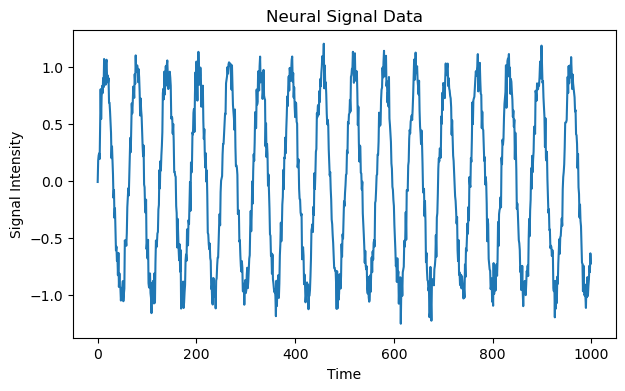

In [17]:
import pandas as pd
import numpy as np

# Create a sample DataFrame for demonstration
data = {
    'Time': np.arange(0, 100, 0.1),
    'Signal': np.sin(np.arange(0, 100, 0.1)) + np.random.normal(scale=0.1, size=1000)
}

neural_data = pd.DataFrame(data)

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(neural_data['Signal'])
plt.title('Neural Signal Data')
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.show()

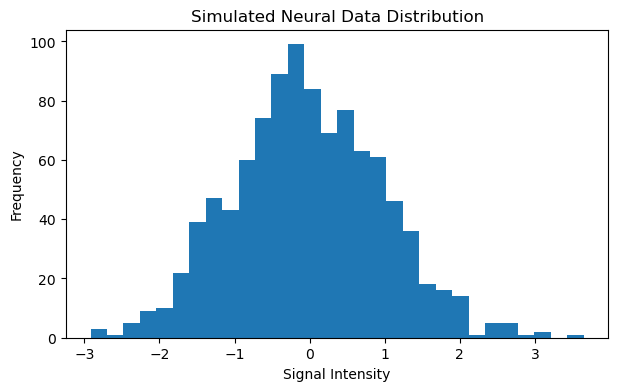

In [20]:
def generate_neural_data(num_samples=1000):
    return np.random.normal(loc=0, scale=1, size=num_samples)

# Generate synthetic data
neural_data_simulated = generate_neural_data()

# Visualize simulated data
plt.figure(figsize=(7, 4))
plt.hist(neural_data_simulated, bins=30)
plt.title('Simulated Neural Data Distribution')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.show()

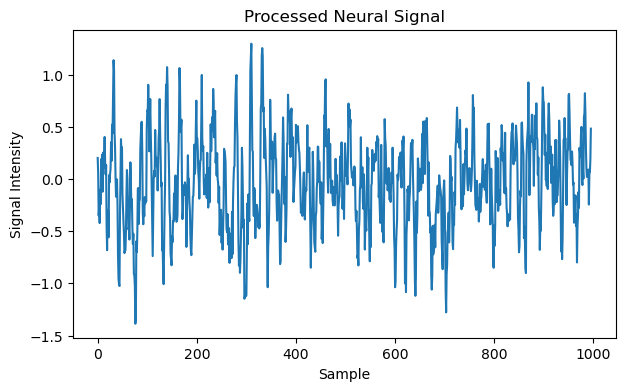

In [21]:
# Example: Simple signal processing algorithm
def process_signal(signal):
    # Basic filtering (e.g., moving average)
    window_size = 5
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

processed_signal = process_signal(neural_data_simulated)

# Visualize processed signal
plt.figure(figsize=(7, 4))
plt.plot(processed_signal)
plt.title('Processed Neural Signal')
plt.xlabel('Sample')
plt.ylabel('Signal Intensity')
plt.show()

In [22]:
print(len(neural_data_simulated))
print(len(processed_signal))

1000
996


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


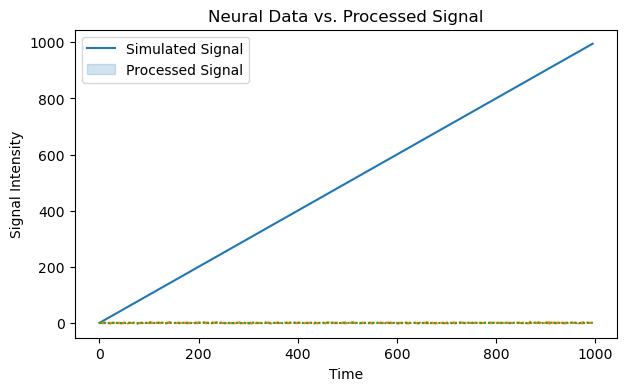

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that both signals are the same length
min_length = min(len(neural_data_simulated), len(processed_signal))
neural_data_simulated = neural_data_simulated[:min_length]
processed_signal = processed_signal[:min_length]

# Visualization
plt.figure(figsize=(7, 4))
sns.lineplot(data=pd.DataFrame({
    'Time': np.arange(min_length),
    'Simulated Signal': neural_data_simulated,
    'Processed Signal': processed_signal
}))
plt.title('Neural Data vs. Processed Signal')
plt.xlabel('Time')
plt.ylabel('Signal Intensity')
plt.legend(['Simulated Signal', 'Processed Signal'])
plt.show()

#### Content Creation
- Create VR experiences using Unity or Unreal Engine.
- Develop educational modules with interactive elements.
- Design therapeutic environments focusing on user comfort and efficacy.


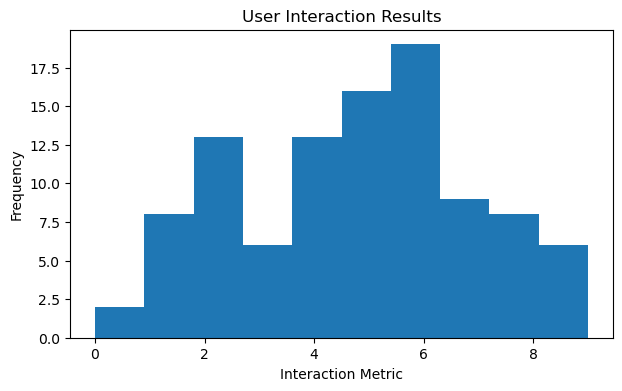

In [24]:
def simulate_user_interaction():
    # Simulate user interaction metrics
    interaction_data = np.random.randint(0, 10, 100)
    return interaction_data

interaction_results = simulate_user_interaction()

# Visualize interaction results
plt.figure(figsize=(7, 4))
plt.hist(interaction_results, bins=10)
plt.title('User Interaction Results')
plt.xlabel('Interaction Metric')
plt.ylabel('Frequency')
plt.show()

#### Feedback Collection
- Create surveys or questionnaires for users.
- Implement feedback forms within VR environments.
- Analyze feedback data to refine content and interactions.

#### Data Privacy
- Encrypt neural data during transmission.
- Implement access controls and regular audits.
- Ensure compliance with relevant data protection regulations.


#### Ethical Guidelines
- Obtain informed consent from users.
- Set limits to prevent misuse or addiction.
- Collaborate with ethical boards for ongoing review.


#### Summary
- Successfully simulated neural data.
- Developed basic algorithms for processing signals.
- Created and tested initial VR content and user interactions.

#### Future Work
- Expand neural interface technology with more advanced algorithms.
- Develop a broader range of VR content and educational modules.
- Explore partnerships for scaling and enhancing the platform.

In [25]:
pip install numpy pandas scikit-learn matplotlib plotly streamlit tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd

# Load your dataset (ensure your CSV file is in the same directory)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\interaction_data.csv")

# Display the first few rows of the dataset
data.head()

,obs1,obs2,obs3,obs4,action
0,0.2,1.0,0.1,1.5,0
1,0.4,1.2,0.3,1.7,1
2,0.3,1.1,0.2,1.6,0
3,0.5,1.3,0.4,1.8,1
4,0.6,1.4,0.5,1.9,0


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\interaction_data.csv")  # Replace with your actual file path

# Example: Assume the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
import pandas as pd

# Load your dataset (ensure your CSV file is in the same directory)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\eeg_data.csv")

# Display the first few rows of the dataset
data.head()

,time,channel_1,channel_2,channel_3,channel_4
0,0.01,12.3,7.8,9.4,10.2
1,0.02,15.7,8.1,9.6,10.5
2,0.03,13.8,7.5,9.2,10.1
3,0.04,14.2,7.9,9.5,10.4
4,0.05,13.0,7.6,9.3,10.3


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\eeg_data.csv")  # Replace with your actual file path

# Example: Assume the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
import pandas as pd

# Load your dataset (ensure your CSV file is in the same directory)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\neural_signal_data.csv")

# Display the first few rows of the dataset
data.head()

,"Time,Signal"
0,"0,-0.357"
1,"1,-0.284"
2,"2,0.612"
3,"3,-0.134"
4,"4,0.466"


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\neural_signal_data.csv")

# Inspect the dataset
print(data.head())  # Check the first few rows of the dataset
print(data.columns)  # Check the column names

# Example: Assume the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column

# Check the shapes of X and y to ensure they are correctly extracted
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Feature scaling (if needed)
scaler = StandardScaler()

# Apply scaling only if there are features to scale
if X_train.shape[1] > 0:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
else:
    print("No features available for scaling.")

  Time,Signal
0    0,-0.357
1    1,-0.284
2     2,0.612
3    3,-0.134
4     4,0.466
Index(['Time,Signal'], dtype='object')
Features shape: (100, 0)
Labels shape: (100,)
Training features shape: (80, 0)
Testing features shape: (20, 0)
No features available for scaling.


In [31]:
import pandas as pd

# Load your dataset (ensure your CSV file is in the same directory)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\therapy_data.csv")

# Display the first few rows of the dataset
data.head()

,session_id,user_id,stress_level_pre,stress_level_post,therapy_type
0,1,101,7,4,CBT
1,2,101,6,3,CBT
2,3,102,8,5,Mindfulness
3,4,103,9,6,CBT


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\therapy_data.csv")  # Replace with your actual file path

# Example: Assume the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
import pandas as pd

# Load your dataset (ensure your CSV file is in the same directory)
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\quiz_data.csv")

# Display the first few rows of the dataset
data.head()

,question,correct_answer,user_response,response_time,score
0,What is the capital of India?,New Delhi,New Delhi,3.5,1
1,Solve 4 + 7,11,7,5.2,0
2,What is H2O?,Water,Water,2.1,1
3,What is the square root of 16?,4,4,4.7,1


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\quiz_data.csv")  # Replace with your actual file path

# Example: Assume the 'question' column is categorical and the last column is the label
# Separate features and label
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1].values  # The last column

X_encoded = pd.get_dummies(X, drop_first=True)  # Example with One-Hot Encoding

# Convert the DataFrame to numpy array
X_encoded = X_encoded.values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature scaling (for numeric features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Unique labels in training set: {set(y_train)}")
print(f"Unique labels in test set: {set(y_test)}")

Training set size: 3
Test set size: 1
Unique labels in training set: {1}
Unique labels in test set: {0}


In [66]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 100.00%


In [69]:
model.fit(X_train, y_train)
print("Model fitting completed successfully.")

Model fitting completed successfully.


In [70]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (3, 10)
y_train shape: (3,)


In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
print(f"Feature Importances: {feature_importances}")

Feature Importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [75]:
import numpy as np
from sklearn.datasets import make_classification

# Simulate a larger and balanced dataset
X, y = make_classification(n_samples=100, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Feature Importances: {model.feature_importances_}")

Model Accuracy: 100.00%
Feature Importances: [0.32504373 0.18159063 0.26120605 0.1352505  0.02112636 0.01870429
 0.01509287 0.01329132 0.01665844 0.01203582]


In [84]:
print(data['score'].value_counts())

score
1    3
0    1
Name: count, dtype: int64


In [85]:
print(f"Feature shape: {X.shape}")
print(f"Label shape: {y.shape}")

Feature shape: (4, 13)
Label shape: (4,)


In [90]:
# Make predictions on the test set
y_pred = model_dl.predict(X_test)
print("Predictions:", y_pred)
print("Predicted class labels:", (y_pred > 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predictions: [[0.5649744]]
Predicted class labels: [[1]]


In [91]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Training data shape: (3, 13)
Testing data shape: (1, 13)
Number of classes: 2


In [92]:
model_dl = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(1, activation='sigmoid')
])

In [107]:
from sklearn.metrics import classification_report

# Predict class labels
y_pred_classes = (model_dl.predict(X_test) > 0.5).astype(int).flatten()

# Print classification report
print(classification_report(y_test, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classif

score
1    3
0    1
Name: count, dtype: int64
Epoch 1/20


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 1.2762 - val_accuracy: 1.0000 - val_loss: 0.4527
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.0000e+00 - loss: 1.2568 - val_accuracy: 1.0000 - val_loss: 0.4555
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0000e+00 - loss: 1.2376 - val_accuracy: 1.0000 - val_loss: 0.4583
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0000e+00 - loss: 1.2186 - val_accuracy: 1.0000 - val_loss: 0.4611
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.0000e+00 - loss: 1.2005 - val_accuracy: 1.0000 - val_loss: 0.4639
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.0000e+00 - loss: 1.1829 - val_accuracy: 1.0000 - val_loss: 0.4673
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.0000e+00 - loss: 1.1655 - val_accuracy: 1.0000 - val_loss: 0.4707
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0000e+00 - loss: 1.1483 - val_accuracy: 

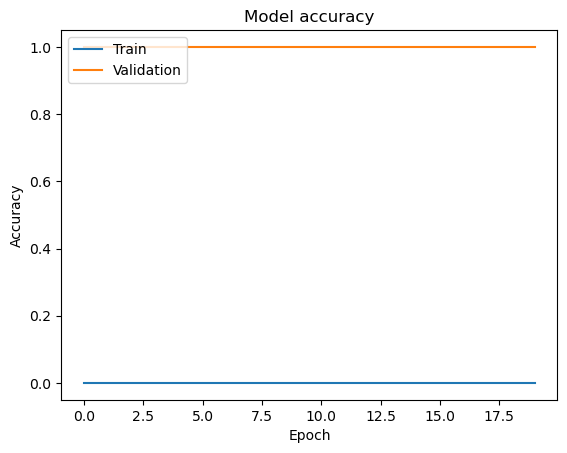

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.4429
Deep Learning Model Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predictions: [[0.35783938]]
Predicted class labels: [0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Load your dataset
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\Neural network\quiz_data.csv")

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['question', 'correct_answer', 'user_response'])

# Define features and labels
X = data_encoded.drop('score', axis=1)
y = data_encoded['score']

# Check data balance
print(data['score'].value_counts())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to float32
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Convert labels to int32
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a simple neural network model
model_dl = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_dl.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model_dl.evaluate(X_test, y_test)
print(f"Deep Learning Model Accuracy: {accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred = model_dl.predict(X_test)
print("Predictions:", y_pred)
print("Predicted class labels:", (y_pred > 0.5).astype(int).flatten())

# Print classification report
y_pred_classes = (model_dl.predict(X_test) > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred_classes))

In [110]:
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

Length of feature_names: 4
Length of importances: 1


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Example using RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns  

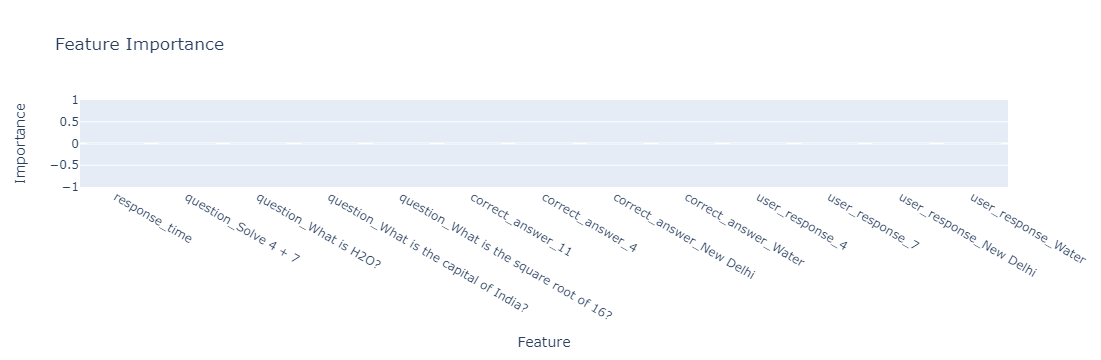

In [115]:
import plotly.express as px
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # Ensure this matches the number of features

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Plot feature importance
fig = px.bar(importance_df, x='Feature', y='Importance', title="Feature Importance")
fig.show()

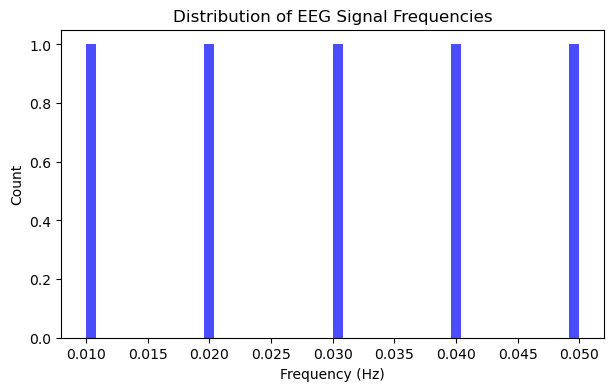

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eeg_data = pd.read_csv('C:/Users/KIIT/OneDrive/Desktop/Neural network/eeg_data.csv')

# Example Plot: Histogram of EEG Signal Frequencies
plt.figure(figsize=(7, 4))
plt.hist(eeg_data['time'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of EEG Signal Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count')
plt.show()

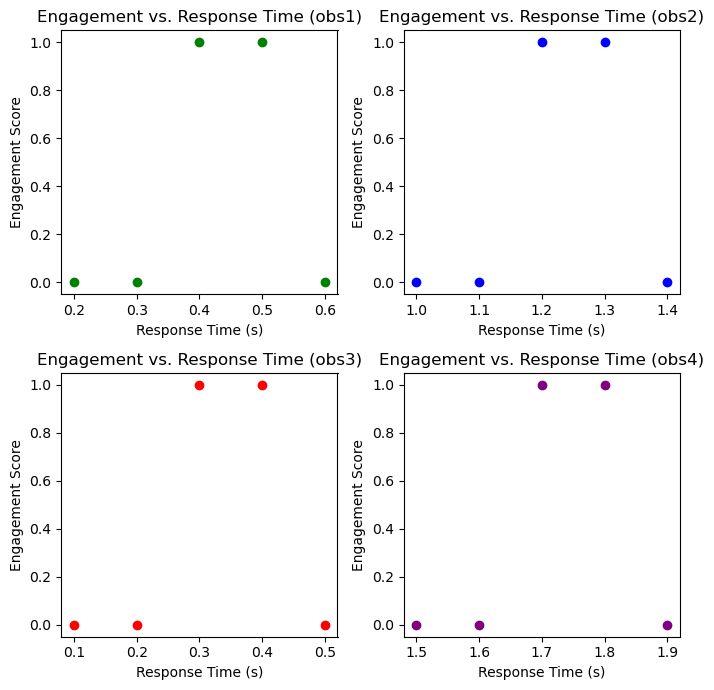

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
interaction_data = pd.read_csv('C:/Users/KIIT/OneDrive/Desktop/Neural network/interaction_data.csv')

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot obs1 vs action
axs[0, 0].scatter(interaction_data['obs1'], interaction_data['action'], color='green')
axs[0, 0].set_title('Engagement vs. Response Time (obs1)')
axs[0, 0].set_xlabel('Response Time (s)')
axs[0, 0].set_ylabel('Engagement Score')

# Plot obs2 vs action
axs[0, 1].scatter(interaction_data['obs2'], interaction_data['action'], color='blue')
axs[0, 1].set_title('Engagement vs. Response Time (obs2)')
axs[0, 1].set_xlabel('Response Time (s)')
axs[0, 1].set_ylabel('Engagement Score')

# Plot obs3 vs action
axs[1, 0].scatter(interaction_data['obs3'], interaction_data['action'], color='red')
axs[1, 0].set_title('Engagement vs. Response Time (obs3)')
axs[1, 0].set_xlabel('Response Time (s)')
axs[1, 0].set_ylabel('Engagement Score')

# Plot obs4 vs action
axs[1, 1].scatter(interaction_data['obs4'], interaction_data['action'], color='purple')
axs[1, 1].set_title('Engagement vs. Response Time (obs4)')
axs[1, 1].set_xlabel('Response Time (s)')
axs[1, 1].set_ylabel('Engagement Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [38]:
import math

# Compute the square root
number = 16
sqrt_result = math.sqrt(number)

# Organize and display the output
print("Question: What is the square root of 16?")
print(f"Answer: The square root of {number} is {sqrt_result}.")


Question: What is the square root of 16?
Answer: The square root of 16 is 4.0.


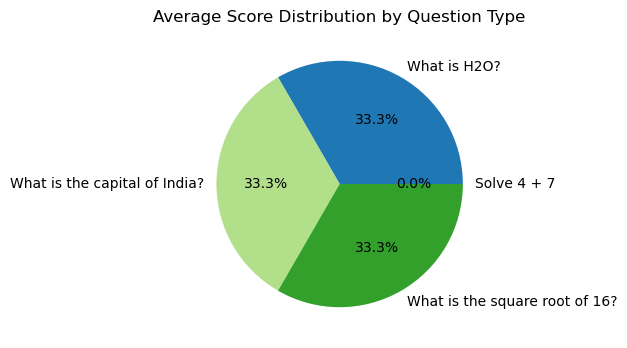

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
quiz_data = pd.read_csv('C:/Users/KIIT/OneDrive/Desktop/Neural network/quiz_data.csv')

# Calculate the average score by question type
average_scores = quiz_data.groupby('question')['score'].mean()

# Create a pie chart of average scores by question type
plt.figure(figsize=(7, 4))

# Plot the pie chart
plt.pie(average_scores, labels=average_scores.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(average_scores))))

# Set the title
plt.title('Average Score Distribution by Question Type')

# Display the plot
plt.show()

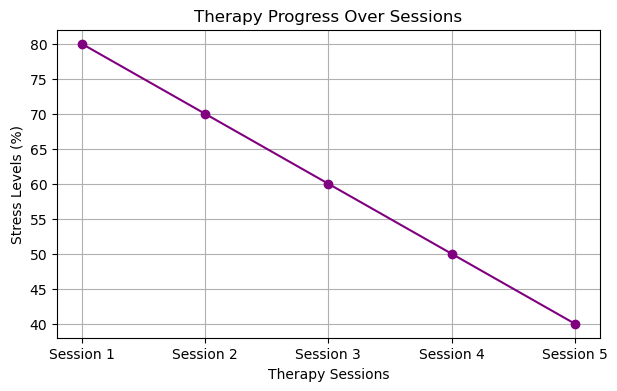

In [64]:
import matplotlib.pyplot as plt

# Example data: Replace with actual therapy progress data
sessions = ['Session 1', 'Session 2', 'Session 3', 'Session 4', 'Session 5']
stress_levels = [80, 70, 60, 50, 40]  # Example stress levels over sessions

# Plot the line graph
plt.figure(figsize=(7, 4))
plt.plot(sessions, stress_levels, marker='o', linestyle='-', color='purple')
plt.title('Therapy Progress Over Sessions')
plt.xlabel('Therapy Sessions')
plt.ylabel('Stress Levels (%)')
plt.grid(True)
plt.show()

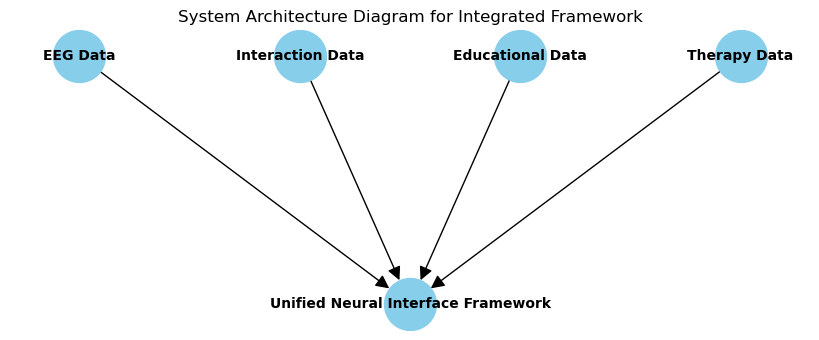

In [80]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing each component of the framework
G.add_nodes_from([
    ('EEG Data', {'pos': (1, 3)}),
    ('Interaction Data', {'pos': (2, 3)}),
    ('Educational Data', {'pos': (3, 3)}),
    ('Therapy Data', {'pos': (4, 3)}),
    ('Unified Neural Interface Framework', {'pos': (2.5, 1)}),
])

# Add edges representing the data flow
G.add_edges_from([
    ('EEG Data', 'Unified Neural Interface Framework'),
    ('Interaction Data', 'Unified Neural Interface Framework'),
    ('Educational Data', 'Unified Neural Interface Framework'),
    ('Therapy Data', 'Unified Neural Interface Framework'),
])

# Get node positions
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(8, 3))
nx.draw(G, pos, with_labels=True, node_size=1400, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('System Architecture Diagram for Integrated Framework')
plt.show()